In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import datetime as dt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_excel(r'tsf.xlsx')
df.head()

,date of week start,season type,distributers,fixed pay,cost of raw materails,other expenditure,cash out,net profit margin,cash in
0,2010-01-04,0,14,540000,537000,375000,1452000,0.49,2163480
1,2010-01-11,1,18,900000,604800,520800,2025600,0.66,3362496
2,2010-01-18,1,16,1020000,505200,597600,2122800,0.53,3247884
3,2010-01-25,2,32,1275000,696800,1072500,3044300,0.85,5631955
4,2010-02-01,2,29,1325000,592800,1138500,3056300,0.80,5501340


In [5]:
df.rename(columns={'date of week start' : 'week_start', 'cash in': 'cashflow'}, inplace= True)

In [6]:
df.head()

,week_start,season type,distributers,fixed pay,cost of raw materails,other expenditure,cash out,net profit margin,cashflow
0,2010-01-04,0,14,540000,537000,375000,1452000,0.49,2163480
1,2010-01-11,1,18,900000,604800,520800,2025600,0.66,3362496
2,2010-01-18,1,16,1020000,505200,597600,2122800,0.53,3247884
3,2010-01-25,2,32,1275000,696800,1072500,3044300,0.85,5631955
4,2010-02-01,2,29,1325000,592800,1138500,3056300,0.80,5501340


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   week_start             571 non-null    datetime64[ns]
 1   season type            571 non-null    int64         
 2   distributers           571 non-null    int64         
 3   fixed pay              571 non-null    int64         
 4   cost of raw materails  571 non-null    int64         
 5   other expenditure      571 non-null    int64         
 6   cash out               571 non-null    int64         
 7   net profit margin      571 non-null    float64       
 8   cashflow               571 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 40.3 KB


In [40]:
df.describe()

,season type,distributers,fixed pay,cost of raw materails,other expenditure,cash out,net profit margin,cashflow
count,571.000000,571.000000,5.710000e+02,571.000000,5.710000e+02,5.710000e+02,571.000000,5.710000e+02
mean,0.998249,18.457093,9.377846e+05,589510.858144,6.895771e+05,2.216873e+06,0.629545,3.731430e+06
std,0.707105,5.428595,2.784400e+05,70055.990048,3.548050e+05,6.678148e+05,0.200025,1.566351e+06
min,0.000000,10.000000,5.250000e+05,492000.000000,3.500000e+05,1.418000e+06,0.250000,1.806840e+06
25%,0.500000,15.000000,7.175000e+05,542400.000000,4.510000e+05,1.718650e+06,0.500000,2.625920e+06
50%,1.000000,18.000000,9.200000e+05,574800.000000,5.508000e+05,2.021600e+06,0.630000,3.285892e+06
75%,1.000000,20.000000,1.020000e+06,604800.000000,6.108000e+05,2.214600e+06,0.750000,3.811886e+06
max,2.000000,32.000000,1.400000e+06,798400.000000,1.497000e+06,3.615100e+06,1.000000,7.118496e+06


In [7]:
df1 = df[['week_start', 'cashflow']]

In [8]:
df1.set_index('week_start', inplace=True)

In [41]:
df1.head()

,cashflow,forecast,forecast_1
week_start,,,
2010-01-04,2163480,NaN,NaN
2010-01-11,3362496,NaN,NaN
2010-01-18,3247884,NaN,NaN
2010-01-25,5631955,NaN,NaN
2010-02-01,5501340,NaN,NaN


In [10]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(cashflow):
    result=adfuller(cashflow)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(df1['cashflow'])

ADF Test Statistic : -5.943728489587214
p-value : 2.2295198470543505e-07
#Lags Used : 19
Number of Observations Used : 551
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(df1['cashflow'], model = 'additive')

In [13]:
trend = decom.trend
seasonal = decom.seasonal
residual = decom.resid

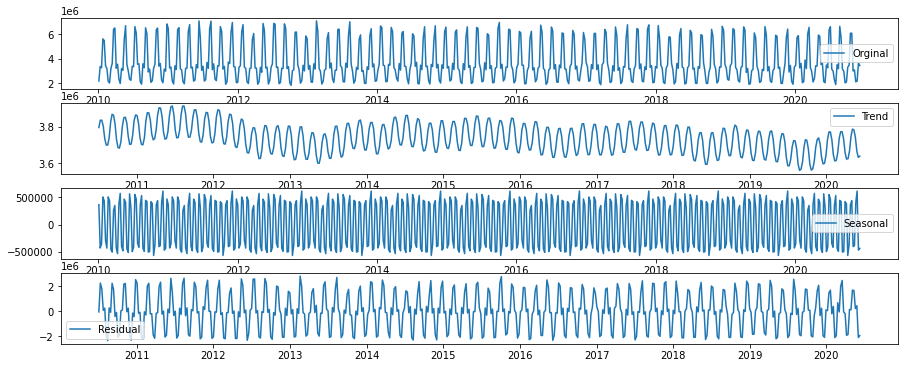

In [14]:
plt.figure(figsize=(15,6))
plt.subplot(411)
plt.plot(df1['cashflow'], label = 'Orginal')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

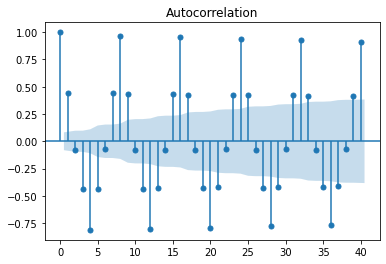

In [16]:
plot_acf(df1['cashflow'], lags = 40)
plt.show()

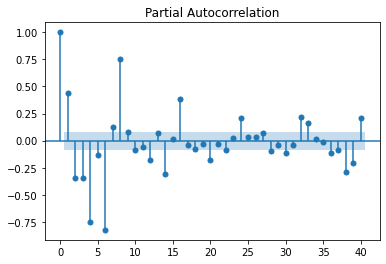

In [17]:
plot_pacf(df1['cashflow'], lags = 40)
plt.show()

In [18]:
df1.shape

(571, 1)

In [19]:
df1_train = df1.iloc[:500,:]
df1_test = df1.iloc[500:, :]

# ARMA Model

In [20]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df1_train,order = (5,0))
fitted = model.fit()
fitted.summary()

C:\Users\anisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               cashflow   No. Observations:                  500
Model:                     ARMA(5, 0)   Log Likelihood               -7525.700
Method:                       css-mle   S.D. of innovations         829296.824
Date:                Mon, 19 Jul 2021   AIC                          15065.400
Time:                        15:30:42   BIC                          15094.902
Sample:                    01-04-2010   HQIC                         15076.976
                         - 07-29-2019                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.743e+06    1.9e+04    197.470      0.000    3.71e+06    3.78e+06
ar.L1.cashflow     0.1330      0.045      2.986      0.003       0.046       0.220
ar.L2.cashflow    -0.2433      0.032     -7.714      0.000      -0.305      -0.182
ar.L3.cashflow    -0.0143      0.033     -0.431      0.666      -0.080       0.051
ar.L4.cashflow    -0.7155      0.031    -22.885      0.000      -0.777      -0.654
ar.L5.cashflow    -0.1243      0.045     -2.790      0.005      -0.212      -0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7125           -0.7395j            1.0269           -0.1280
AR.2            0.7125           +0.7395j            1.0269            0.1280
AR.3           -0.6871           -0.9174j            1.1462           -0.3523
AR.4           -0.6871           +0.9174j            1.1462            0.3523
AR.5           -5.8045           -0.0000j            5.8045           -0.5000
-----------------------------------------------------------------------------
"""

In [21]:
fc,se,conf =  fitted.forecast(71, alpha = 0.05)

In [22]:
fc_series = pd.Series(fc, index=df1_test.index)
lower_series = pd.Series(conf[:, 0], index=df1_test.index)
upper_series = pd.Series(conf[:, 1], index=df1_test.index)

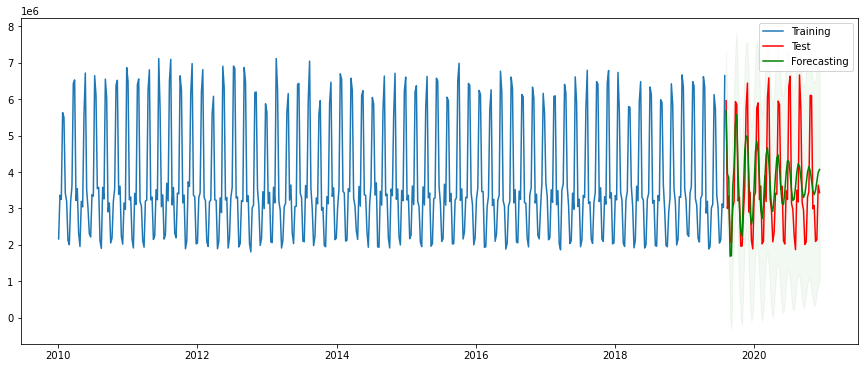

In [23]:
plt.figure(figsize=(15,6))
plt.plot(df1_train, label = 'Training')
plt.plot(df1_test, label = 'Test', color = 'red')
plt.plot(fc_series, label = 'Forecasting', color = 'green')
plt.fill_between(lower_series.index, lower_series, upper_series,color='g', alpha=.05)
plt.legend(loc = 'best')
plt.show()

In [24]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df1_train,order = (10,0))
fitted = model.fit()
fitted.summary()

C:\Users\anisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               cashflow   No. Observations:                  500
Model:                    ARMA(10, 0)   Log Likelihood               -7053.470
Method:                       css-mle   S.D. of innovations         318442.917
Date:                Mon, 19 Jul 2021   AIC                          14130.941
Time:                        15:30:56   BIC                          14181.516
Sample:                    01-04-2010   HQIC                         14150.786
                         - 07-29-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.743e+06   1.52e+04    246.055      0.000    3.71e+06    3.77e+06
ar.L1.cashflow      0.0559      0.044      1.258      0.209      -0.031       0.143
ar.L2.cashflow     -0.1329      0.045     -2.984      0.003      -0.220      -0.046
ar.L3.cashflow      0.0524      0.033      1.588      0.112      -0.012       0.117
ar.L4.cashflow     -0.2898      0.033     -8.837      0.000      -0.354      -0.226
ar.L5.cashflow      0.0431      0.033      1.297      0.195      -0.022       0.108
ar.L6.cashflow     -0.2683      0.033     -8.063      0.000      -0.334      -0.203
ar.L7.cashflow      0.0610      0.033      1.854      0.064      -0.003       0.125
ar.L8.cashflow      0.6836      0.033     20.789      0.000       0.619       0.748
ar.L9.cashflow      0.0039      0.045      0.088      0.930      -0.084       0.092
ar.L10.cashflow    -0.1416      0.045     -3.159      0.002      -0.229      -0.054
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.0016           -1.0081j            1.0081           -0.2502
AR.2            -0.0016           +1.0081j            1.0081            0.2502
AR.3             0.7079           -0.7081j            1.0013           -0.1250
AR.4             0.7079           +0.7081j            1.0013            0.1250
AR.5             1.2033           -0.0000j            1.2033           -0.0000
AR.6            -0.7108           -0.7130j            1.0067           -0.3748
AR.7            -0.7108           +0.7130j            1.0067            0.3748
AR.8             2.1437           -0.0000j            2.1437           -0.0000
AR.9            -1.3594           -0.0000j            1.3594           -0.5000
AR.10           -1.9510           -0.0000j            1.9510           -0.5000
------------------------------------------------------------------------------
"""

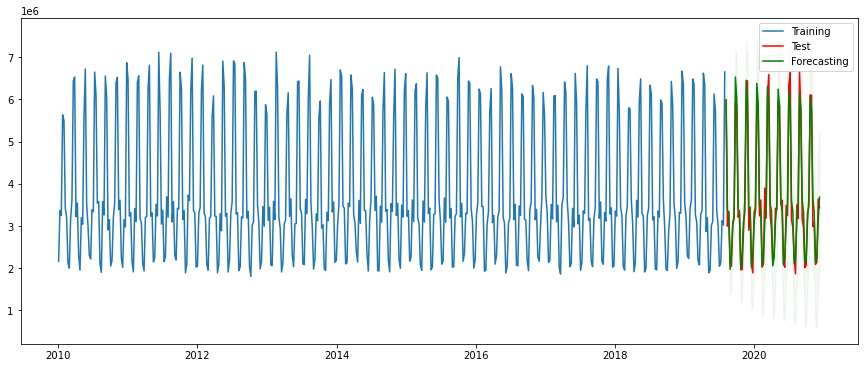

In [25]:
fc,se,conf =  fitted.forecast(71, alpha = 0.05)
fc_series_1 = pd.Series(fc, index=df1_test.index)
lower_series_1 = pd.Series(conf[:, 0], index=df1_test.index)
upper_series_1= pd.Series(conf[:, 1], index=df1_test.index)
plt.figure(figsize=(15,6))
plt.plot(df1_train, label = 'Training')
plt.plot(df1_test, label = 'Test', color = 'red')
plt.plot(fc_series_1, label = 'Forecasting', color = 'green')
plt.fill_between(lower_series_1.index, lower_series_1, upper_series_1,color='g', alpha=.05)
plt.legend(loc = 'best')
plt.show()

# ARIMA Model

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model = ARIMA(df1['cashflow'], order = (1,1,1))
model_fit = model.fit()

C:\Users\anisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
C:\Users\anisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.cashflow   No. Observations:                  570
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8880.054
Method:                       css-mle   S.D. of innovations        1404752.875
Date:                Mon, 19 Jul 2021   AIC                          17768.109
Time:                        15:30:59   BIC                          17785.491
Sample:                    01-11-2010   HQIC                         17774.891
                         - 12-07-2020                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -137.3749    639.168     -0.215      0.830   -1390.120    1115.371
ar.L1.D.cashflow     0.4443      0.038     11.802      0.000       0.371       0.518
ma.L1.D.cashflow    -1.0000      0.004   -231.499      0.000      -1.008      -0.992
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2507           +0.0000j            2.2507            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [29]:
df1['forecast'] = model_fit.predict(start = 500, end = 572, dynamic = True)

<AxesSubplot:xlabel='week_start'>

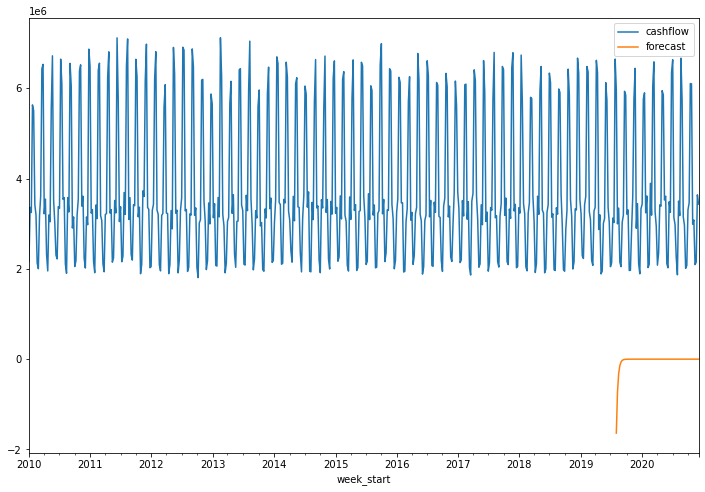

In [30]:
df1[['cashflow','forecast']].plot(figsize = (12,8))

# SARIMA Model

In [31]:
import statsmodels.api as sm

In [32]:
model_1=sm.tsa.statespace.SARIMAX(df1['cashflow'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model_1.fit()

C:\Users\anisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
C:\Users\anisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='week_start'>

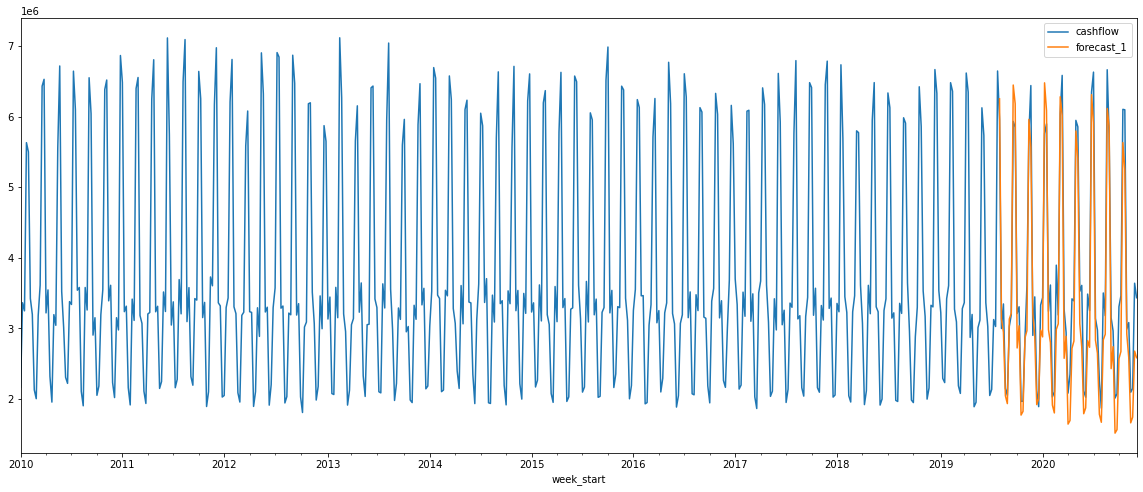

In [33]:
df1['forecast_1'] = results.predict(start = 500, end = 572, dynamic = True)
df1[['cashflow','forecast_1']].plot(figsize = (20,8))

In [34]:
df1.tail()

,cashflow,forecast,forecast_1
week_start,,,
2020-11-09,3081420,-137.374852,2.586057e+06
2020-11-16,2093760,-137.374852,1.660341e+06
2020-11-23,2147040,-137.374852,1.741493e+06
2020-11-30,3639520,-137.374852,2.677014e+06
2020-12-07,3433980,-137.374852,2.583737e+06


In [35]:
from pandas.tseries.offsets import DateOffset
future = [df1.index[-1] + DateOffset(weeks = x) for x in range(0,24)]

In [36]:
future_df = pd.DataFrame(index= future[1:], columns= df1.columns)
future_df.head()

,cashflow,forecast,forecast_1
2020-12-14,NaN,NaN,NaN
2020-12-21,NaN,NaN,NaN
2020-12-28,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN
2021-01-11,NaN,NaN,NaN


In [37]:
future_df_1 = pd.concat([df1, future_df])

C:\Users\anisa\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

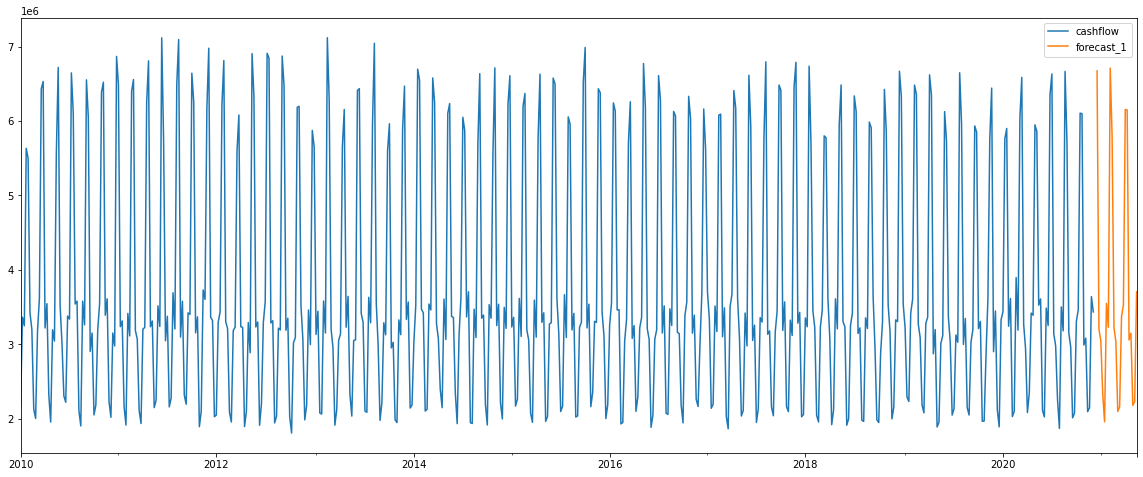

In [38]:
future_df_1['forecast_1'] = results.predict(start = 572, end = 620, dynamic = True)
future_df_1[['cashflow','forecast_1']].plot(figsize = (20,8))

# THANK YOU